In [67]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [21]:
def time_lambda(x, tau):
  N = len(x)
  lambda_bar = 0

  for i in range(N - tau):
    d0 = abs(x[i] - x[i+tau])
    n = int((N - i)/tau)
    dn = abs(x[n*tau + i-1] - x[(n-1)*tau + i-1])
    lambda_bar += np.log(dn/d0)/n
  
  return lambda_bar/N


In [27]:
path02 = '/content/0.200.txt'
path09 = '/content/0.900.txt'
pathlm = '/content/logistic_map4.txt'
pathp = '/content/position.txt'
pathp2 = '/content/position2.txt'
pathv  = '/content/velocity.txt'

_02 = np.loadtxt(path02)
_09 = np.loadtxt(path09)
lm = np.loadtxt(pathlm)
pos = np.loadtxt(pathp)
pos2 = np.loadtxt(pathp2)
vel = np.loadtxt(pathv)


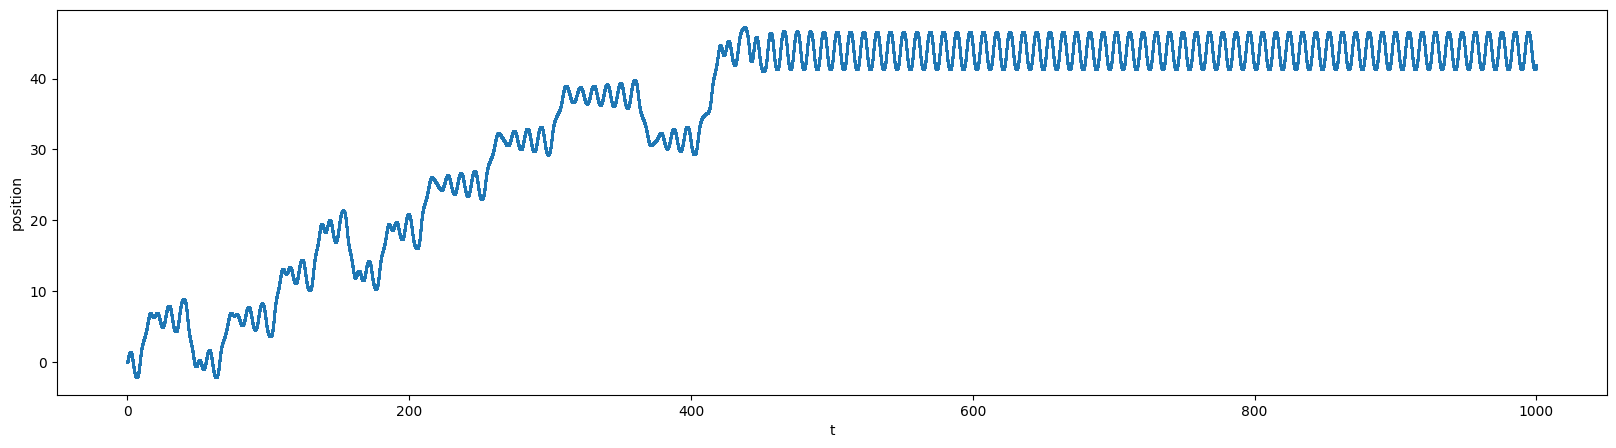

In [50]:
plt.figure(figsize = (20,5))
plt.xlabel('t')
plt.ylabel('position')
plt.scatter(np.transpose(pos)[0], np.transpose(pos)[1], s=1)

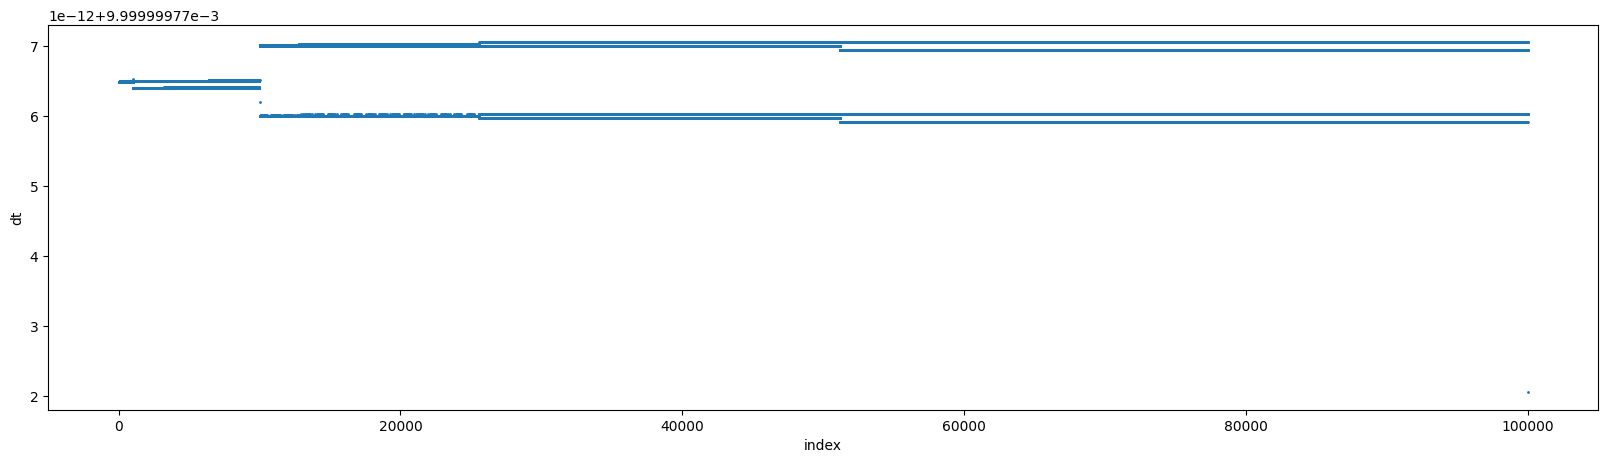

In [58]:
dt = np.zeros(len(pos)-1)
for i in range(len(pos)-1):
  dt[i] = pos[i+1][0] - pos[i][0] 

plt.figure(figsize = (20,5))
plt.ylabel('dt')
plt.xlabel('index')
plt.scatter(np.arange(len(dt)), dt, s=1)

In [56]:
_02 = np.transpose(_02)[1]
_09 = np.transpose(_09)[1]

In [36]:
tau = np.linspace(1 , len(_02), 1000)

lambda_bar02 = np.zeros(1000)
lambda_bar09 = np.zeros(1000)
lambda_barlm = np.zeros(1000)
lambda_barpos = np.zeros(1000)
lambda_barpos2 = np.zeros(1000)
lambda_barvel = np.zeros(1000)

In [39]:
for t in range(1000):
  lambda_bar02[t] = time_lambda(_02, int(tau[t]))

In [37]:
for t in range(1000):
  lambda_bar09[t] = time_lambda(_09, int(tau[t]))

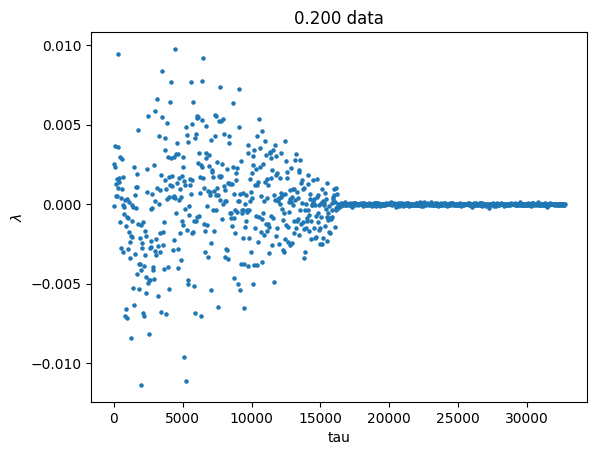

In [41]:
plt.xlabel('tau')
plt.ylabel('$\lambda$')
plt.title('0.200 data')
plt.scatter(tau, lambda_bar02, s=5)

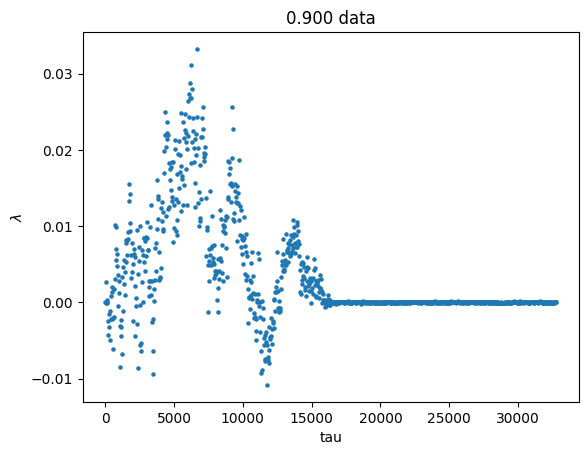

In [40]:
plt.xlabel('tau')
plt.ylabel('$\lambda$')
plt.title('0.900 data')
plt.scatter(tau, lambda_bar09, s=5)

In [68]:
@numba.njit
def time_lambda_irr(x):
  t = x[0]
  x = x[1]
  dt = 0.1
  min_t = np.min(t)
  max_t = np.max(t)
  t = t- min_t
  nT = int((max_t - min_t)/dt) + 1
  N = len(x)
  lambda_bar = np.zeros(nT)

  for ii in range(N):
    for jj in range(ii, N):
      tau = int(abs(t[ii] - t[jj])/dt)
      for i in range(N - tau):
        if tau!=0:
          d0 = abs(x[i] - x[i+tau])
          n = int((N - i)/tau)
          dn = abs(x[n*tau + i-1] - x[(n-1)*tau + i-1])
          lambda_bar[tau] += np.log(dn/d0)/n
  
  return lambda_bar/N